# Análisis de los docentes
En esta subsección describimos las características personales y laborales de los docentes, y evaluamos la asociación de dichas características con la presencia de entrenamiento en bioética.

In [1]:
# Librerías y configuraciones globales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

sns.set_theme(font_scale=1.25, rc={'figure.figsize':[12,8]})

In [2]:
# Datos
df = pd.read_excel('Docentes_Datos.xlsx', engine='openpyxl')
df.head()

,edad,sexo,grado,facultad,carrera,asignaturas,experiencia,no_formal,formal,entrenamiento
0,28,Mujer,Grado Profesional,Facultad de Ciencias de la Salud,Bioquímica,Control de Calidad,3,Diplomado,No,Sí
1,50,Mujer,Grado Profesional,Facultad de Ciencias de la Salud,Bioquímica,Microbiología,7,Diplomado,No,Sí
2,58,Mujer,Especialización,Facultad de Ciencias de la Salud,Enfermería,"Medicina Legal.Criminomogia,Etica",20,Diplomado,No,Sí
3,29,Mujer,Especialización,Facultad de Ciencias de la Salud,Odontología,Histología y Embriología,4,Capacitación,No,Sí
4,28,Mujer,Licenciatura,Facultad de Ciencias de la Salud,Fisioterapia y Kinesiología,Fisiología; Fisiopatología General.,5,Capacitación,No,Sí


In [3]:
# Ajustes de niveles de categorías
df = df.astype({'grado':'category','no_formal':'category','formal':'category'})
df['grado'].cat.reorder_categories(['Licenciatura','Grado Profesional','Especialización','Maestría'], ordered=True, inplace=True)
df['no_formal'].cat.reorder_categories(['No','Cursos cortos','Capacitación','Diplomado'], ordered=True, inplace=True)
df['formal'].cat.reorder_categories(['No','Especialización','Maestría'], ordered=True, inplace=True)

In [4]:
# Información sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   edad           105 non-null    int64   
 1   sexo           105 non-null    object  
 2   grado          105 non-null    category
 3   facultad       105 non-null    object  
 4   carrera        105 non-null    object  
 5   asignaturas    105 non-null    object  
 6   experiencia    105 non-null    int64   
 7   no_formal      105 non-null    category
 8   formal         105 non-null    category
 9   entrenamiento  105 non-null    object  
dtypes: category(3), int64(2), object(5)
memory usage: 6.7+ KB


In [5]:
# Núm. docentes y de variables
df.shape

(105, 10)

# Datos personales

## Edad

In [6]:
df['edad'].describe().astype(int)

count    105
mean      39
std       10
min       23
25%       30
50%       38
75%       46
max       67
Name: edad, dtype: int64

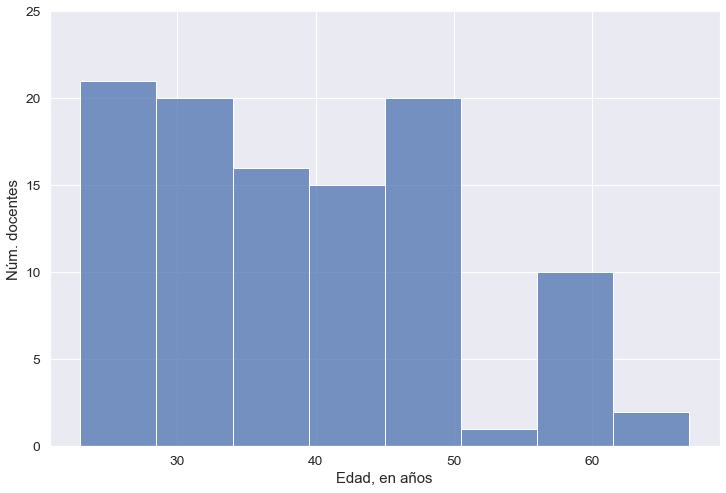

In [7]:
sns.histplot(x='edad', data=df)
plt.ylabel('Núm. docentes')
plt.xlabel('Edad, en años')
plt.ylim(0,25)
plt.show()

## Sexo

In [8]:
df['sexo'].value_counts()

Mujer     81
Hombre    24
Name: sexo, dtype: int64

In [9]:
df['sexo'].value_counts(normalize=True).round(2)

Mujer     0.77
Hombre    0.23
Name: sexo, dtype: float64

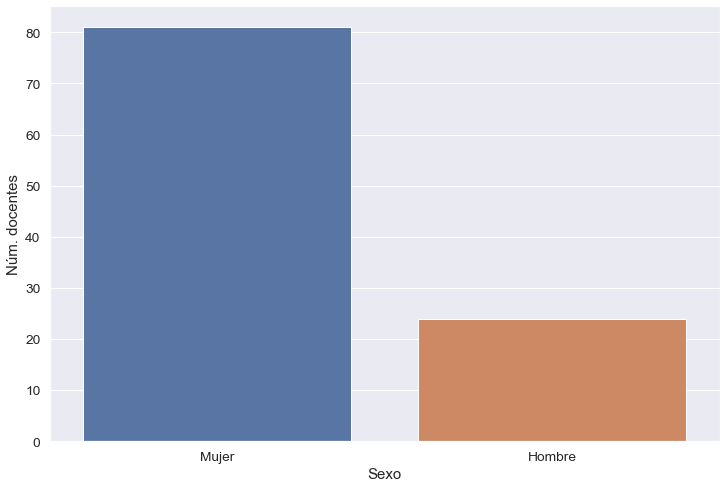

In [10]:
sns.countplot(x='sexo', data=df)
plt.ylabel('Núm. docentes')
plt.xlabel('Sexo')
plt.show()

## Grado académico

In [11]:
df['grado'].value_counts(sort=False)

Licenciatura         24
Grado Profesional    30
Especialización      32
Maestría             19
Name: grado, dtype: int64

In [12]:
df['grado'].value_counts(sort=False, normalize=True).round(2)

Licenciatura         0.23
Grado Profesional    0.29
Especialización      0.30
Maestría             0.18
Name: grado, dtype: float64

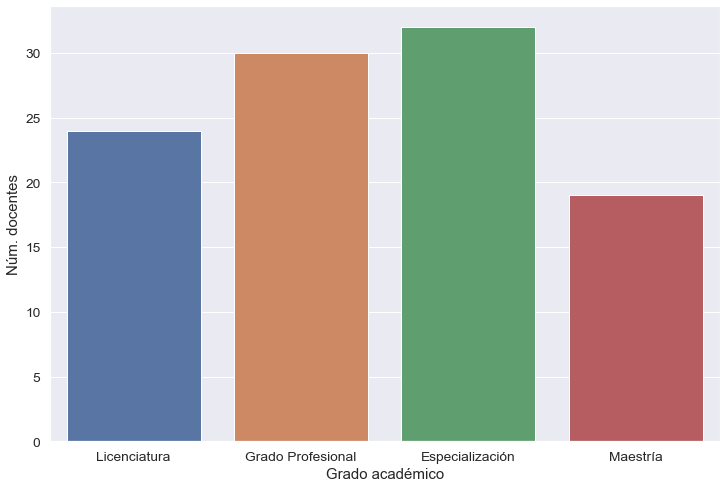

In [13]:
sns.countplot(x='grado', data=df)
plt.xlabel('Grado académico')
plt.ylabel('Núm. docentes')
plt.show()

## Facultad

In [14]:
df['facultad'].value_counts()

Facultad de Ciencias de la Salud    74
Facultad de Medicina                31
Name: facultad, dtype: int64

In [15]:
df['facultad'].value_counts(normalize=True).round(2)

Facultad de Ciencias de la Salud    0.7
Facultad de Medicina                0.3
Name: facultad, dtype: float64

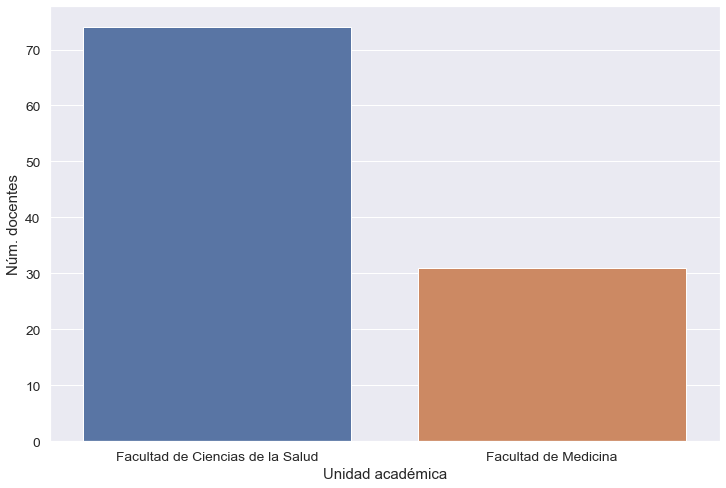

In [16]:
sns.countplot(x='facultad', data=df)
plt.xlabel('Unidad académica')
plt.ylabel('Núm. docentes')
plt.show()

## Carrera

In [17]:
df['carrera'].value_counts()

Fisioterapia y Kinesiología    19
Odontología                    19
Bioquímica                     18
Medicina                       17
Enfermería                     14
Nutrición                      12
Psicología                      6
Name: carrera, dtype: int64

In [18]:
df['carrera'].value_counts(normalize=True).round(2)

Fisioterapia y Kinesiología    0.18
Odontología                    0.18
Bioquímica                     0.17
Medicina                       0.16
Enfermería                     0.13
Nutrición                      0.11
Psicología                     0.06
Name: carrera, dtype: float64

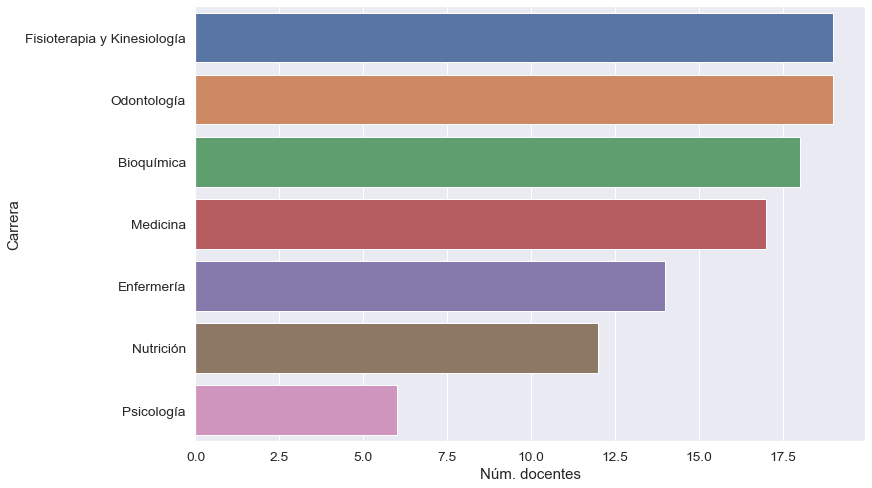

In [19]:
sns.countplot(y='carrera', data=df, order=df['carrera'].value_counts().index)
plt.ylabel('Carrera')
plt.xlabel('Núm. docentes')
plt.show()

## Experiencia docente

In [20]:
df['experiencia'].describe().astype(int)

count    105
mean       8
std        7
min        1
25%        3
50%        6
75%       15
max       35
Name: experiencia, dtype: int64

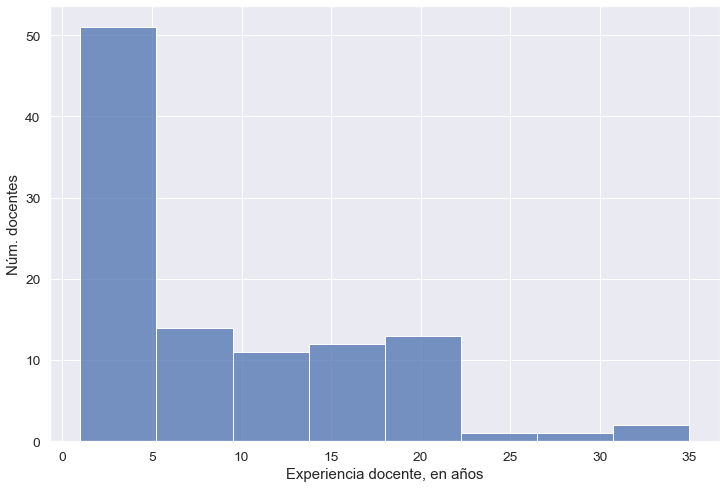

In [21]:
sns.histplot(x='experiencia', data=df)
plt.xlabel('Experiencia docente, en años')
plt.ylabel('Núm. docentes')
plt.show()

# Entrenamiento no formal

In [22]:
df['no_formal'].value_counts(sort=False)

No               80
Cursos cortos    19
Capacitación      3
Diplomado         3
Name: no_formal, dtype: int64

In [23]:
df['no_formal'].value_counts(sort=False, normalize=True).round(2)

No               0.76
Cursos cortos    0.18
Capacitación     0.03
Diplomado        0.03
Name: no_formal, dtype: float64

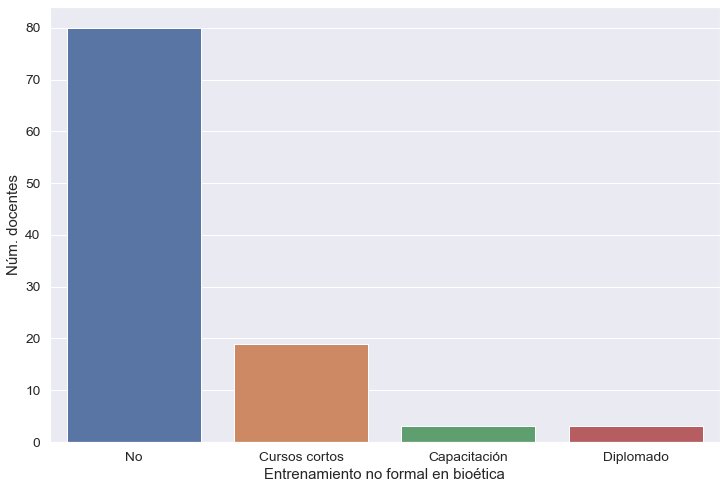

In [24]:
sns.countplot(x='no_formal', data=df)
plt.xlabel('Entrenamiento no formal en bioética')
plt.ylabel('Núm. docentes')
plt.show()

## Entrenamiento no formal y edad

In [25]:
df.groupby('no_formal')['edad'].describe().astype(int).transpose()

no_formal,No,Cursos cortos,Capacitación,Diplomado
count,80,19,3,3
mean,38,42,38,45
std,9,13,17,15
min,23,25,28,28
25%,31,28,28,39
50%,37,45,29,50
75%,44,54,43,54
max,62,67,58,58


In [26]:
scipy.stats.kruskal(*[data['edad'].values for name, data in df.groupby('no_formal')])

KruskalResult(statistic=1.9126906406963458, pvalue=0.5907243163184515)

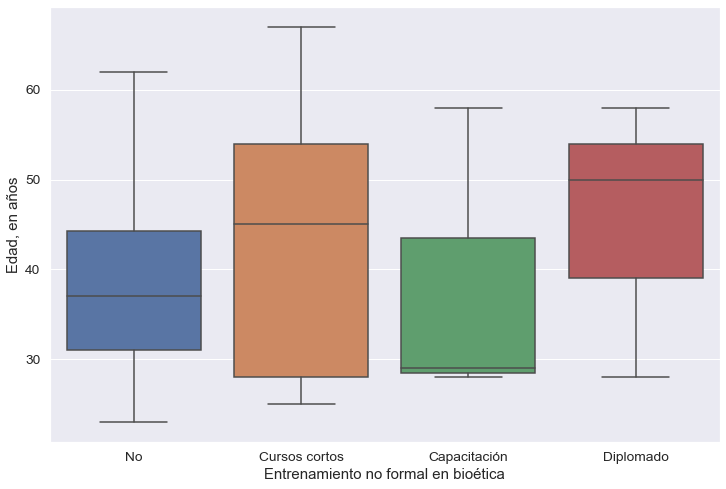

In [27]:
sns.boxplot(x='no_formal', y='edad', data =df)
plt.xlabel('Entrenamiento no formal en bioética')
plt.ylabel('Edad, en años')
plt.show()

## Entrenamiento no formal y sexo

In [28]:
pd.crosstab(df['sexo'], df['no_formal'], margins=True, margins_name='Total')

no_formal,No,Cursos cortos,Capacitación,Diplomado,Total
sexo,,,,,
Hombre,21,3,0,0,24
Mujer,59,16,3,3,81
Total,80,19,3,3,105


In [29]:
pd.crosstab(df['sexo'], df['no_formal'], normalize='index').round(2)

no_formal,No,Cursos cortos,Capacitación,Diplomado
sexo,,,,
Hombre,0.88,0.12,0.00,0.00
Mujer,0.73,0.20,0.04,0.04


In [30]:
scipy.stats.chi2_contingency(pd.crosstab(df['no_formal'], df['sexo']))

(2.838313230994152,
 0.4172316504679091,
 3,
 array([[18.28571429, 61.71428571],
        [ 4.34285714, 14.65714286],
        [ 0.68571429,  2.31428571],
        [ 0.68571429,  2.31428571]]))

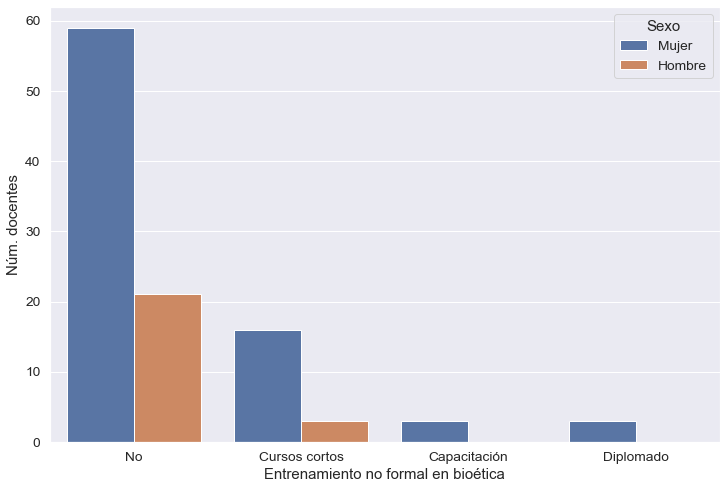

In [31]:
sns.countplot(x='no_formal', hue='sexo', data=df)
plt.xlabel('Entrenamiento no formal en bioética')
plt.ylabel('Núm. docentes')
plt.legend(title='Sexo', loc='upper right')
plt.show()

## Entrenamiento no formal y grado académico

In [32]:
pd.crosstab(df['grado'], df['no_formal'], margins=True, margins_name='Total')

no_formal,No,Cursos cortos,Capacitación,Diplomado,Total
grado,,,,,
Licenciatura,21,2,1,0,24
Grado Profesional,24,3,1,2,30
Especialización,23,7,1,1,32
Maestría,12,7,0,0,19
Total,80,19,3,3,105


In [33]:
pd.crosstab(df['grado'], df['no_formal'], normalize='index').round(2)

no_formal,No,Cursos cortos,Capacitación,Diplomado
grado,,,,
Licenciatura,0.88,0.08,0.04,0.00
Grado Profesional,0.80,0.10,0.03,0.07
Especialización,0.72,0.22,0.03,0.03
Maestría,0.63,0.37,0.00,0.00


In [34]:
scipy.stats.chi2_contingency(pd.crosstab(df['grado'], df['no_formal']))

(10.734184196098798,
 0.29437023229553705,
 9,
 array([[18.28571429,  4.34285714,  0.68571429,  0.68571429],
        [22.85714286,  5.42857143,  0.85714286,  0.85714286],
        [24.38095238,  5.79047619,  0.91428571,  0.91428571],
        [14.47619048,  3.43809524,  0.54285714,  0.54285714]]))

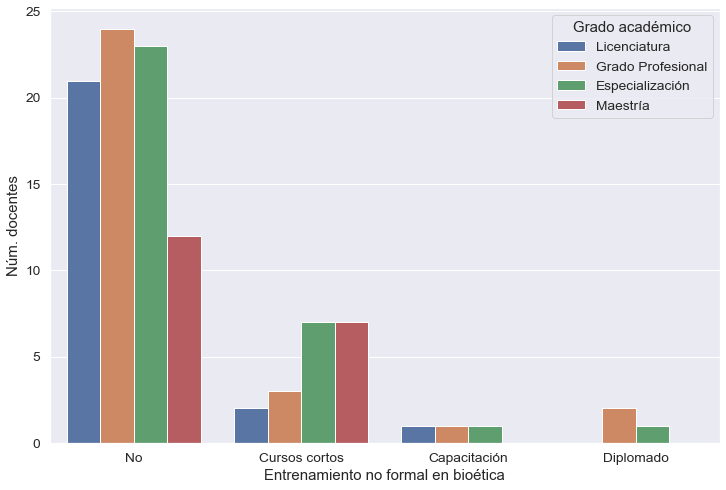

In [35]:
sns.countplot(x='no_formal', hue='grado', data=df)
plt.xlabel('Entrenamiento no formal en bioética')
plt.ylabel('Núm. docentes')
plt.legend(title='Grado académico', loc='upper right')
plt.show()

## Entrenamiento no formal y facultad

In [36]:
pd.crosstab(df['facultad'], df['no_formal'], margins=True, margins_name='Total')

no_formal,No,Cursos cortos,Capacitación,Diplomado,Total
facultad,,,,,
Facultad de Ciencias de la Salud,55,13,3,3,74
Facultad de Medicina,25,6,0,0,31
Total,80,19,3,3,105


In [37]:
pd.crosstab(df['facultad'], df['no_formal'], normalize='index').round(2)

no_formal,No,Cursos cortos,Capacitación,Diplomado
facultad,,,,
Facultad de Ciencias de la Salud,0.74,0.18,0.04,0.04
Facultad de Medicina,0.81,0.19,0.00,0.00


In [38]:
scipy.stats.chi2_contingency(pd.crosstab(df['facultad'], df['no_formal']))

(2.666646113430918,
 0.4459252278918511,
 3,
 array([[56.38095238, 13.39047619,  2.11428571,  2.11428571],
        [23.61904762,  5.60952381,  0.88571429,  0.88571429]]))

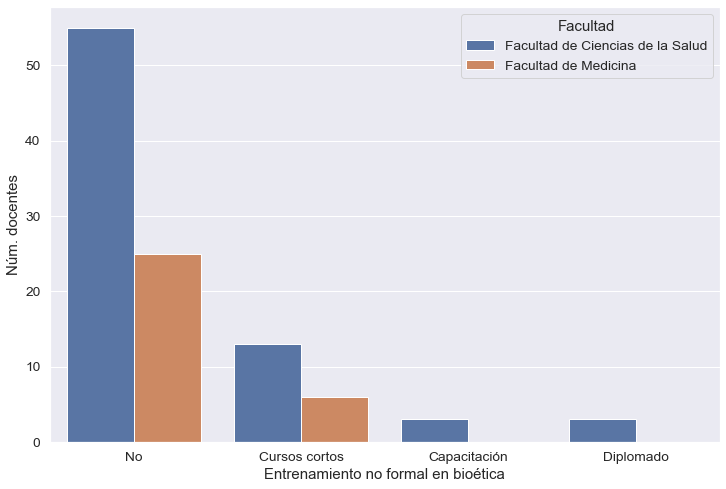

In [39]:
sns.countplot(x='no_formal', hue='facultad', data=df)
plt.xlabel('Entrenamiento no formal en bioética')
plt.ylabel('Núm. docentes')
plt.legend(title='Facultad', loc='upper right')
plt.show()

## Entrenamiento no formal y carrera

In [40]:
pd.crosstab(df['carrera'], df['no_formal'], margins=True, margins_name='Total')

no_formal,No,Cursos cortos,Capacitación,Diplomado,Total
carrera,,,,,
Bioquímica,14,2,0,2,18
Enfermería,4,8,1,1,14
Fisioterapia y Kinesiología,15,3,1,0,19
Medicina,14,3,0,0,17
Nutrición,11,1,0,0,12
Odontología,16,2,1,0,19
Psicología,6,0,0,0,6
Total,80,19,3,3,105


In [41]:
pd.crosstab(df['carrera'], df['no_formal'], normalize='index').round(2)

no_formal,No,Cursos cortos,Capacitación,Diplomado
carrera,,,,
Bioquímica,0.78,0.11,0.00,0.11
Enfermería,0.29,0.57,0.07,0.07
Fisioterapia y Kinesiología,0.79,0.16,0.05,0.00
Medicina,0.82,0.18,0.00,0.00
Nutrición,0.92,0.08,0.00,0.00
Odontología,0.84,0.11,0.05,0.00
Psicología,1.00,0.00,0.00,0.00


In [42]:
scipy.stats.chi2_contingency(pd.crosstab(df['carrera'], df['no_formal']))

(30.380971011442433,
 0.03390322888866364,
 18,
 array([[13.71428571,  3.25714286,  0.51428571,  0.51428571],
        [10.66666667,  2.53333333,  0.4       ,  0.4       ],
        [14.47619048,  3.43809524,  0.54285714,  0.54285714],
        [12.95238095,  3.07619048,  0.48571429,  0.48571429],
        [ 9.14285714,  2.17142857,  0.34285714,  0.34285714],
        [14.47619048,  3.43809524,  0.54285714,  0.54285714],
        [ 4.57142857,  1.08571429,  0.17142857,  0.17142857]]))

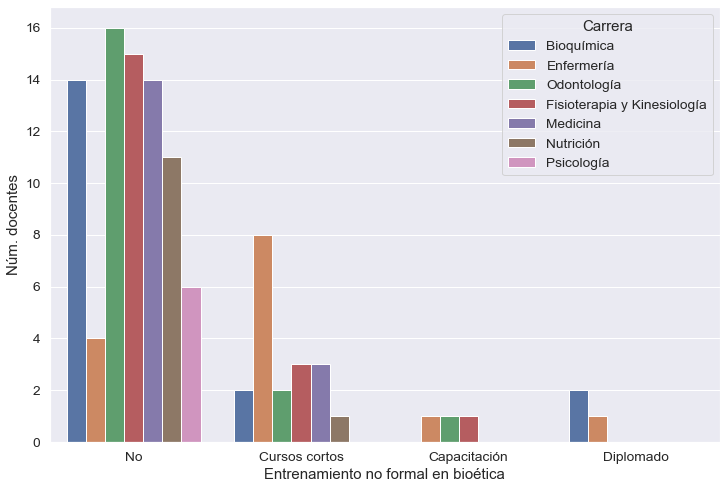

In [43]:
sns.countplot(x='no_formal', hue='carrera', data=df)
plt.xlabel('Entrenamiento no formal en bioética')
plt.ylabel('Núm. docentes')
plt.legend(title='Carrera', loc='upper right')
plt.show()

## Entrenamiento no formal y experiencia docente

In [44]:
df.groupby('no_formal')['experiencia'].describe().astype(int).transpose()

no_formal,No,Cursos cortos,Capacitación,Diplomado
count,80,19,3,3
mean,8,11,9,10
std,7,7,8,8
min,1,1,4,3
25%,3,4,4,5
50%,5,11,5,7
75%,12,17,12,13
max,35,28,20,20


In [45]:
scipy.stats.kruskal(*[data['experiencia'].values for name, data in df.groupby('no_formal')], nan_policy='omit')

KruskalResult(statistic=2.7386406017078104, pvalue=0.43370061764345524)

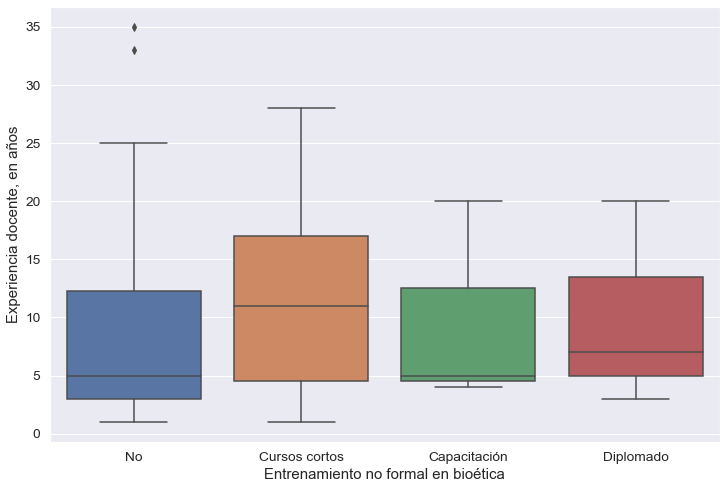

In [46]:
sns.boxplot(x='no_formal', y='experiencia', data =df)
plt.xlabel('Entrenamiento no formal en bioética')
plt.ylabel('Experiencia docente, en años')
plt.show()

# Entrenamiento formal

In [47]:
df['formal'].value_counts()

No                 103
Maestría             1
Especialización      1
Name: formal, dtype: int64

In [48]:
df['formal'].value_counts(normalize=True).round(2)

No                 0.98
Maestría           0.01
Especialización    0.01
Name: formal, dtype: float64

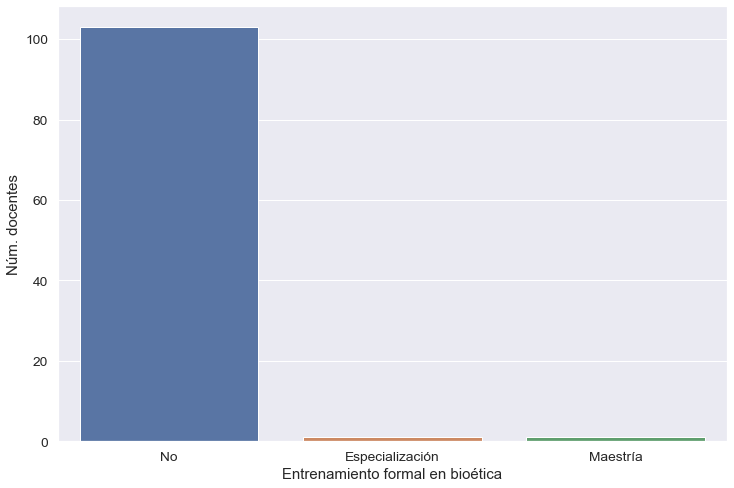

In [49]:
sns.countplot(x='formal', data=df)
plt.xlabel('Entrenamiento formal en bioética')
plt.ylabel('Núm. docentes')
plt.show()

## Entrenamiento formal y edad

In [50]:
df.groupby('formal')['edad'].describe().round().transpose()

formal,No,Especialización,Maestría
count,103.0,1.0,1.0
mean,39.0,32.0,27.0
std,11.0,NaN,NaN
min,23.0,32.0,27.0
25%,30.0,32.0,27.0
50%,38.0,32.0,27.0
75%,46.0,32.0,27.0
max,67.0,32.0,27.0


In [51]:
scipy.stats.kruskal(*[data['edad'].values for name, data in df.groupby('formal')], nan_policy='omit')

KruskalResult(statistic=1.908886438035436, pvalue=0.38502646029474485)

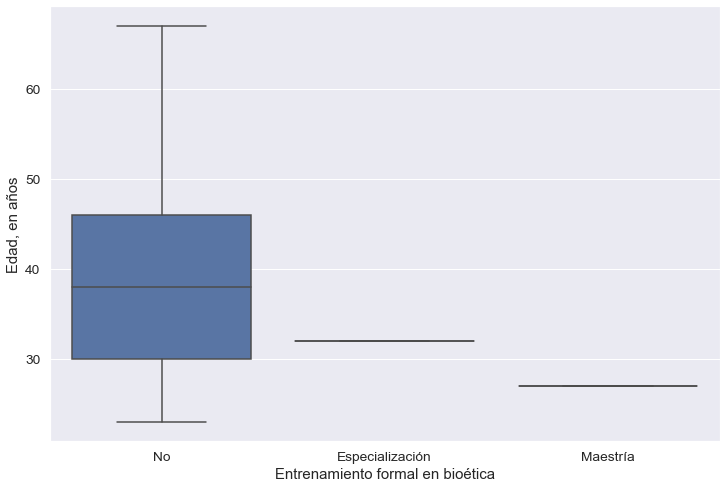

In [52]:
sns.boxplot(x='formal', y='edad', data =df)
plt.xlabel('Entrenamiento formal en bioética')
plt.ylabel('Edad, en años')
plt.show()

## Entrenamiento formal y sexo

In [53]:
pd.crosstab(df['sexo'], df['formal'], margins=True, margins_name='Total')

formal,No,Especialización,Maestría,Total
sexo,,,,
Hombre,23,1,0,24
Mujer,80,0,1,81
Total,103,1,1,105


In [54]:
pd.crosstab(df['sexo'], df['formal'], normalize='index').round(2)

formal,No,Especialización,Maestría
sexo,,,
Hombre,0.96,0.04,0.00
Mujer,0.99,0.00,0.01


In [55]:
scipy.stats.chi2_contingency(pd.crosstab(df['sexo'], df['formal']))

(3.687522473930241,
 0.15822119811342458,
 2,
 array([[23.54285714,  0.22857143,  0.22857143],
        [79.45714286,  0.77142857,  0.77142857]]))

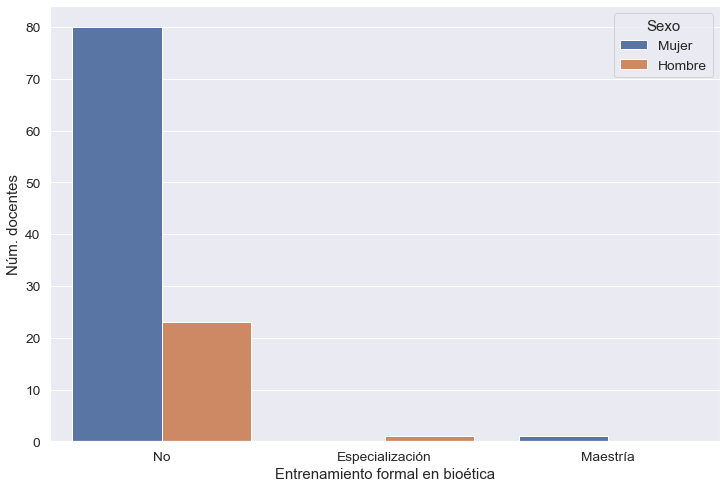

In [56]:
sns.countplot(x='formal', hue='sexo', data=df)
plt.xlabel('Entrenamiento formal en bioética')
plt.ylabel('Núm. docentes')
plt.legend(title='Sexo', loc='upper right')
plt.show()

## Entrenamiento formal y grado académico

In [57]:
variable = 'grado'
entrenamiento = 'formal'
pd.crosstab(df[variable], df[entrenamiento], margins=True, margins_name='Total')

formal,No,Especialización,Maestría,Total
grado,,,,
Licenciatura,24,0,0,24
Grado Profesional,29,0,1,30
Especialización,32,0,0,32
Maestría,18,1,0,19
Total,103,1,1,105


In [58]:
pd.crosstab(df[variable], df[entrenamiento], normalize='index').round(2)

formal,No,Especialización,Maestría
grado,,,
Licenciatura,1.00,0.00,0.00
Grado Profesional,0.97,0.00,0.03
Especialización,1.00,0.00,0.00
Maestría,0.95,0.05,0.00


In [59]:
scipy.stats.chi2_contingency(pd.crosstab(df[variable], df[entrenamiento]))

(7.075114971895759,
 0.3139564744956458,
 6,
 array([[23.54285714,  0.22857143,  0.22857143],
        [29.42857143,  0.28571429,  0.28571429],
        [31.39047619,  0.3047619 ,  0.3047619 ],
        [18.63809524,  0.18095238,  0.18095238]]))

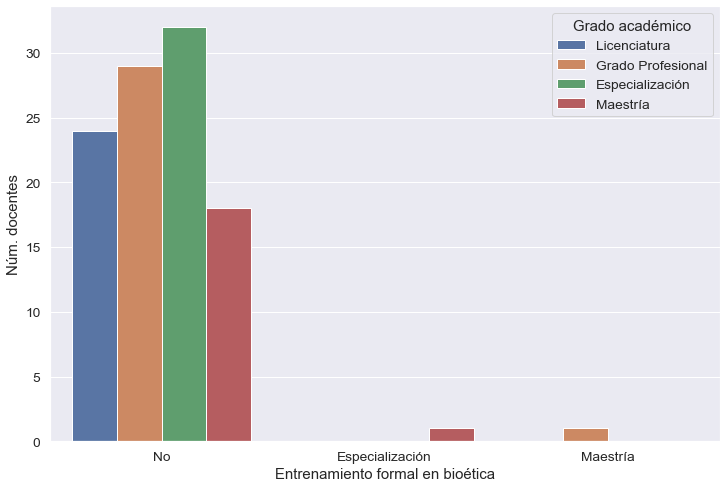

In [60]:
sns.countplot(x=entrenamiento, hue=variable, data=df)
plt.xlabel('Entrenamiento formal en bioética')
plt.ylabel('Núm. docentes')
plt.legend(title='Grado académico', loc='upper right')
plt.show()

## Entrenamiento formal y facultad

In [61]:
variable = 'facultad'
entrenamiento = 'formal'
pd.crosstab(df[variable], df[entrenamiento], margins=True, margins_name='Total')

formal,No,Especialización,Maestría,Total
facultad,,,,
Facultad de Ciencias de la Salud,73,0,1,74
Facultad de Medicina,30,1,0,31
Total,103,1,1,105


In [62]:
pd.crosstab(df[variable], df[entrenamiento], normalize='index').round(2)

formal,No,Especialización,Maestría
facultad,,,
Facultad de Ciencias de la Salud,0.99,0.00,0.01
Facultad de Medicina,0.97,0.03,0.00


In [63]:
scipy.stats.chi2_contingency(pd.crosstab(df[variable], df[entrenamiento]))

(2.8138410881912286,
 0.24489627042876436,
 2,
 array([[72.59047619,  0.7047619 ,  0.7047619 ],
        [30.40952381,  0.2952381 ,  0.2952381 ]]))

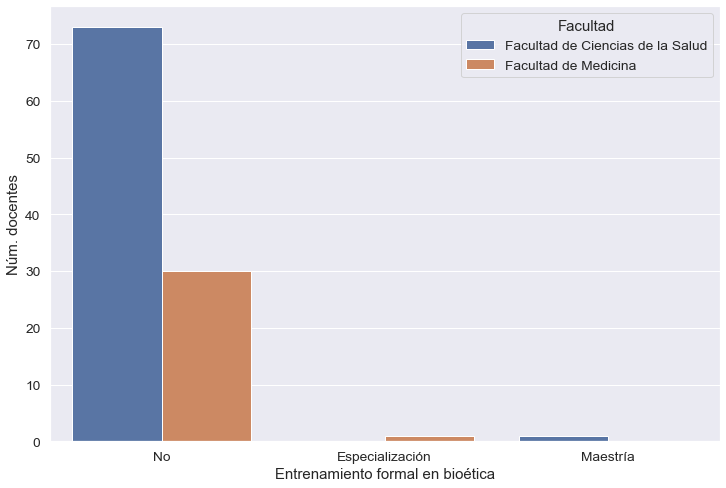

In [64]:
sns.countplot(x=entrenamiento, hue=variable, data=df)
plt.xlabel('Entrenamiento formal en bioética')
plt.ylabel('Núm. docentes')
plt.legend(title='Facultad', loc='upper right')
plt.show()

## Entrenamiento formal y carrera

In [65]:
variable = 'carrera'
entrenamiento = 'formal'
pd.crosstab(df[variable], df[entrenamiento], margins=True, margins_name='Total')

formal,No,Especialización,Maestría,Total
carrera,,,,
Bioquímica,18,0,0,18
Enfermería,14,0,0,14
Fisioterapia y Kinesiología,19,0,0,19
Medicina,16,1,0,17
Nutrición,12,0,0,12
Odontología,18,0,1,19
Psicología,6,0,0,6
Total,103,1,1,105


In [66]:
pd.crosstab(df[variable], df[entrenamiento], normalize='index').round(2)

formal,No,Especialización,Maestría
carrera,,,
Bioquímica,1.00,0.00,0.00
Enfermería,1.00,0.00,0.00
Fisioterapia y Kinesiología,1.00,0.00,0.00
Medicina,0.94,0.06,0.00
Nutrición,1.00,0.00,0.00
Odontología,0.95,0.00,0.05
Psicología,1.00,0.00,0.00


In [67]:
scipy.stats.chi2_contingency(pd.crosstab(df[variable], df[entrenamiento]))

(9.777570711473144,
 0.6354670626616614,
 12,
 array([[17.65714286,  0.17142857,  0.17142857],
        [13.73333333,  0.13333333,  0.13333333],
        [18.63809524,  0.18095238,  0.18095238],
        [16.67619048,  0.16190476,  0.16190476],
        [11.77142857,  0.11428571,  0.11428571],
        [18.63809524,  0.18095238,  0.18095238],
        [ 5.88571429,  0.05714286,  0.05714286]]))

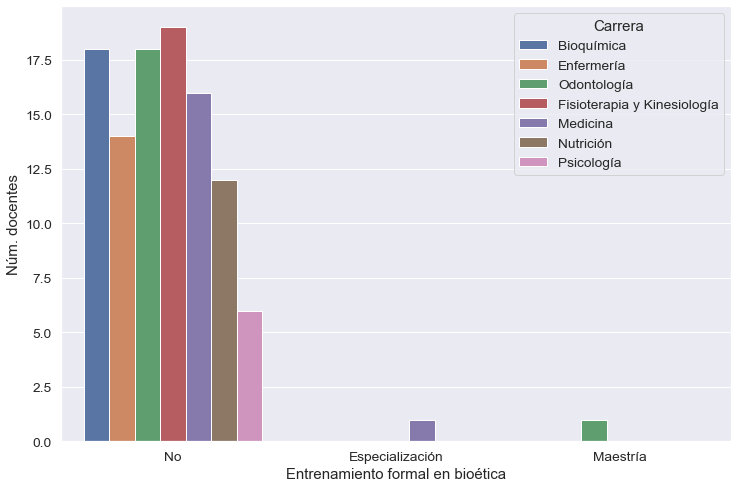

In [68]:
sns.countplot(x=entrenamiento, hue=variable, data=df)
plt.xlabel('Entrenamiento formal en bioética')
plt.ylabel('Núm. docentes')
plt.legend(title='Carrera', loc='upper right')
plt.show()

## Entrenamiento formal y experiencia docente

In [69]:
variable = 'edad'
entrenamiento = 'formal'
df.groupby(entrenamiento)[variable].describe().round().transpose()

formal,No,Especialización,Maestría
count,103.0,1.0,1.0
mean,39.0,32.0,27.0
std,11.0,NaN,NaN
min,23.0,32.0,27.0
25%,30.0,32.0,27.0
50%,38.0,32.0,27.0
75%,46.0,32.0,27.0
max,67.0,32.0,27.0


In [70]:
scipy.stats.kruskal(*[data[variable].values for name, data in df.groupby(entrenamiento)], nan_policy='omit')

KruskalResult(statistic=1.908886438035436, pvalue=0.38502646029474485)

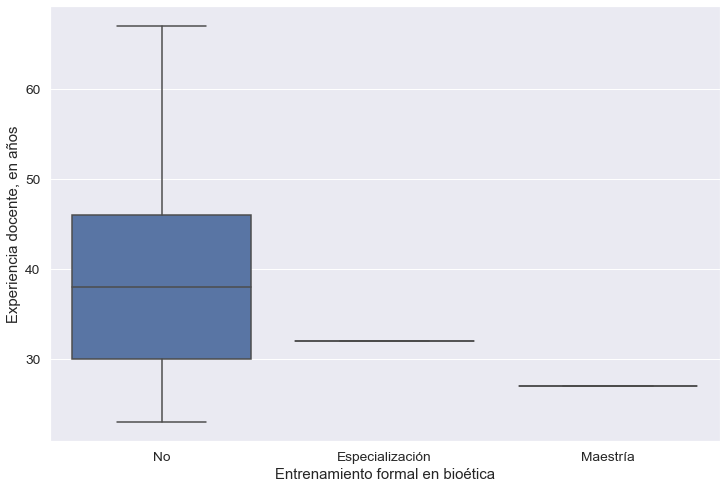

In [71]:
sns.boxplot(x=entrenamiento, y=variable, data =df)
plt.xlabel('Entrenamiento formal en bioética')
plt.ylabel('Experiencia docente, en años')
plt.show()

# Entrenamiento formal + no formal

In [72]:
df['entrenamiento'].value_counts()

No    79
Sí    26
Name: entrenamiento, dtype: int64

In [73]:
df['entrenamiento'].value_counts(normalize=True).round(2)

No    0.75
Sí    0.25
Name: entrenamiento, dtype: float64

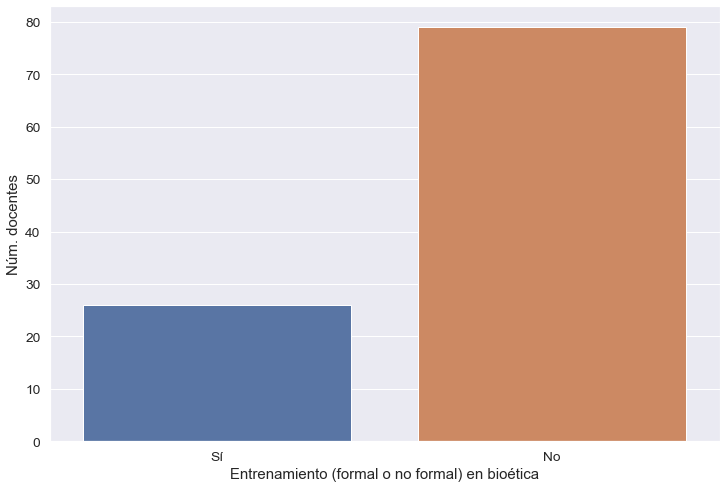

In [74]:
sns.countplot(x='entrenamiento', data=df)
plt.xlabel('Entrenamiento (formal o no formal) en bioética')
plt.ylabel('Núm. docentes')
plt.show()

## Entrenamiento y edad

In [75]:
variable = 'edad'
entrenamiento = 'entrenamiento'
df.groupby(entrenamiento)[variable].describe().round().transpose()

entrenamiento,No,Sí
count,79.0,26.0
mean,38.0,42.0
std,9.0,14.0
min,23.0,25.0
25%,31.0,28.0
50%,37.0,44.0
75%,44.0,56.0
max,62.0,67.0


In [76]:
scipy.stats.kruskal(*[data[variable].values for name, data in df.groupby(entrenamiento)], nan_policy='omit')

KruskalResult(statistic=0.5801745286470208, pvalue=0.44624391940836794)

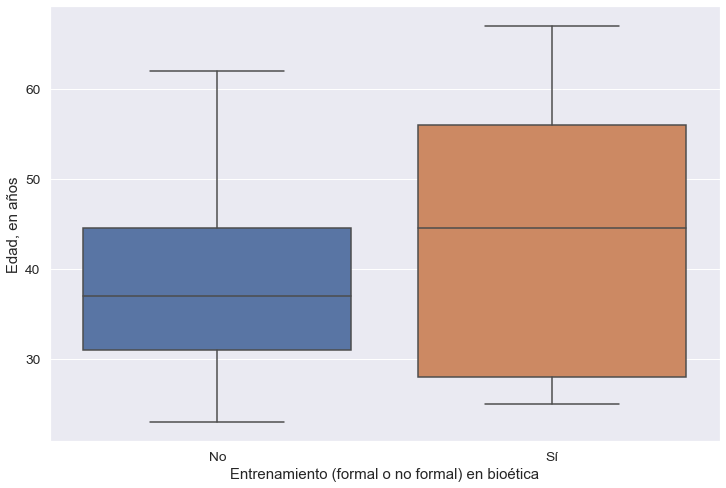

In [77]:
sns.boxplot(x=entrenamiento, y=variable, data =df, order=['No','Sí'])
plt.xlabel('Entrenamiento (formal o no formal) en bioética')
plt.ylabel('Edad, en años')
plt.show()

## Entrenamiento y sexo

In [78]:
variable = 'sexo'
entrenamiento = 'entrenamiento'
pd.crosstab(df[variable], df[entrenamiento], margins=True, margins_name='Total')

entrenamiento,No,Sí,Total
sexo,,,
Hombre,21,3,24
Mujer,58,23,81
Total,79,26,105


In [79]:
pd.crosstab(df[variable], df[entrenamiento], normalize='index').round(2)

entrenamiento,No,Sí
sexo,,
Hombre,0.88,0.12
Mujer,0.72,0.28


In [80]:
scipy.stats.chi2_contingency(pd.crosstab(df[variable], df[entrenamiento]))

(1.7300845910418698,
 0.18840009485761022,
 1,
 array([[18.05714286,  5.94285714],
        [60.94285714, 20.05714286]]))

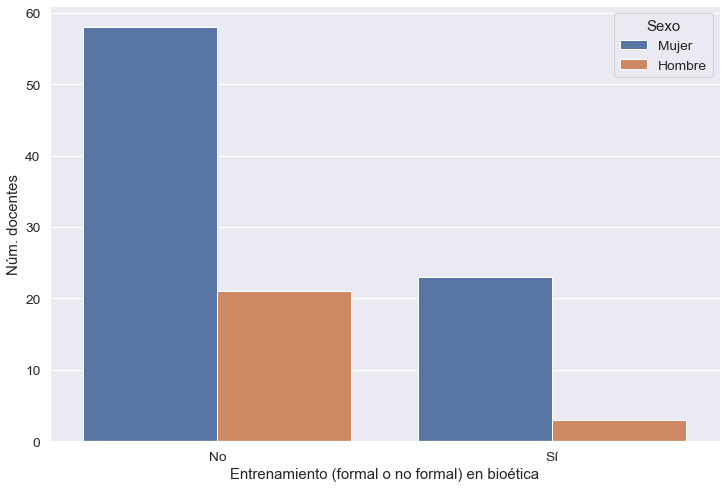

In [81]:
sns.countplot(x=entrenamiento, hue=variable, data=df, order=['No','Sí'])
plt.xlabel('Entrenamiento (formal o no formal) en bioética')
plt.ylabel('Núm. docentes')
plt.legend(title='Sexo', loc='upper right')
plt.show()

## Entrenamiento y grado académico

In [82]:
variable = 'grado'
entrenamiento = 'entrenamiento'
pd.crosstab(df[variable], df[entrenamiento], margins=True, margins_name='Total')

entrenamiento,No,Sí,Total
grado,,,
Licenciatura,21,3,24
Grado Profesional,23,7,30
Especialización,23,9,32
Maestría,12,7,19
Total,79,26,105


In [83]:
pd.crosstab(df[variable], df[entrenamiento], normalize='index').round(2)

entrenamiento,No,Sí
grado,,
Licenciatura,0.88,0.12
Grado Profesional,0.77,0.23
Especialización,0.72,0.28
Maestría,0.63,0.37


In [84]:
scipy.stats.chi2_contingency(pd.crosstab(df[variable], df[entrenamiento]))

(3.6522886985599343,
 0.3015412344375639,
 3,
 array([[18.05714286,  5.94285714],
        [22.57142857,  7.42857143],
        [24.07619048,  7.92380952],
        [14.2952381 ,  4.7047619 ]]))

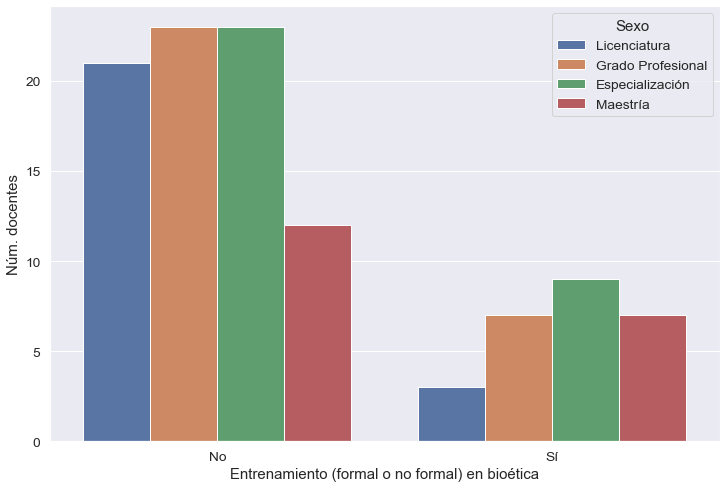

In [85]:
sns.countplot(x=entrenamiento, hue=variable, data=df, order=['No','Sí'])
plt.xlabel('Entrenamiento (formal o no formal) en bioética')
plt.ylabel('Núm. docentes')
plt.legend(title='Sexo', loc='upper right')
plt.show()

## Entrenamiento y facultad

In [86]:
variable = 'facultad'
entrenamiento = 'entrenamiento'
pd.crosstab(df[variable], df[entrenamiento], margins=True, margins_name='Total')

entrenamiento,No,Sí,Total
facultad,,,
Facultad de Ciencias de la Salud,54,20,74
Facultad de Medicina,25,6,31
Total,79,26,105


In [87]:
pd.crosstab(df[variable], df[entrenamiento], normalize='index').round(2)

entrenamiento,No,Sí
facultad,,
Facultad de Ciencias de la Salud,0.73,0.27
Facultad de Medicina,0.81,0.19


In [88]:
scipy.stats.chi2_contingency(pd.crosstab(df[variable], df[entrenamiento]))

(0.33988293622327964,
 0.5598968011370057,
 1,
 array([[55.67619048, 18.32380952],
        [23.32380952,  7.67619048]]))

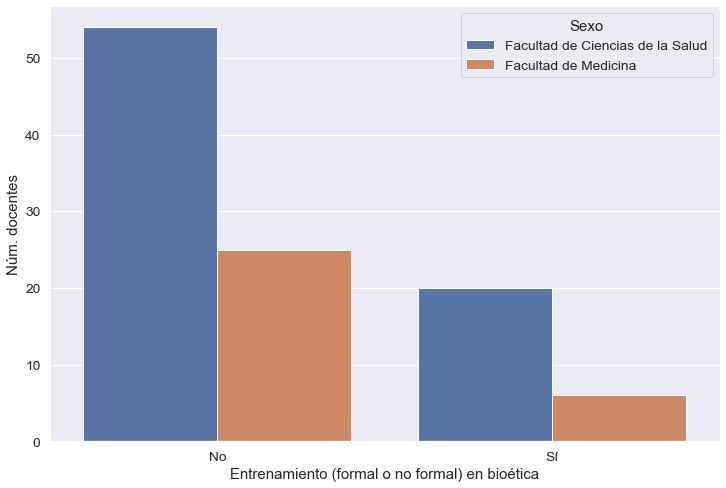

In [89]:
sns.countplot(x=entrenamiento, hue=variable, data=df, order=['No','Sí'])
plt.xlabel('Entrenamiento (formal o no formal) en bioética')
plt.ylabel('Núm. docentes')
plt.legend(title='Sexo', loc='upper right')
plt.show()

## Entrenamiento y carrera

In [90]:
variable = 'carrera'
entrenamiento = 'entrenamiento'
pd.crosstab(df[variable], df[entrenamiento], margins=True, margins_name='Total')

entrenamiento,No,Sí,Total
carrera,,,
Bioquímica,14,4,18
Enfermería,4,10,14
Fisioterapia y Kinesiología,15,4,19
Medicina,14,3,17
Nutrición,11,1,12
Odontología,15,4,19
Psicología,6,0,6
Total,79,26,105


In [91]:
pd.crosstab(df[variable], df[entrenamiento], normalize='index').round(2)

entrenamiento,No,Sí
carrera,,
Bioquímica,0.78,0.22
Enfermería,0.29,0.71
Fisioterapia y Kinesiología,0.79,0.21
Medicina,0.82,0.18
Nutrición,0.92,0.08
Odontología,0.79,0.21
Psicología,1.00,0.00


In [92]:
scipy.stats.chi2_contingency(pd.crosstab(df[variable], df[entrenamiento]))

(20.883123543580297,
 0.001925452804237642,
 6,
 array([[13.54285714,  4.45714286],
        [10.53333333,  3.46666667],
        [14.2952381 ,  4.7047619 ],
        [12.79047619,  4.20952381],
        [ 9.02857143,  2.97142857],
        [14.2952381 ,  4.7047619 ],
        [ 4.51428571,  1.48571429]]))

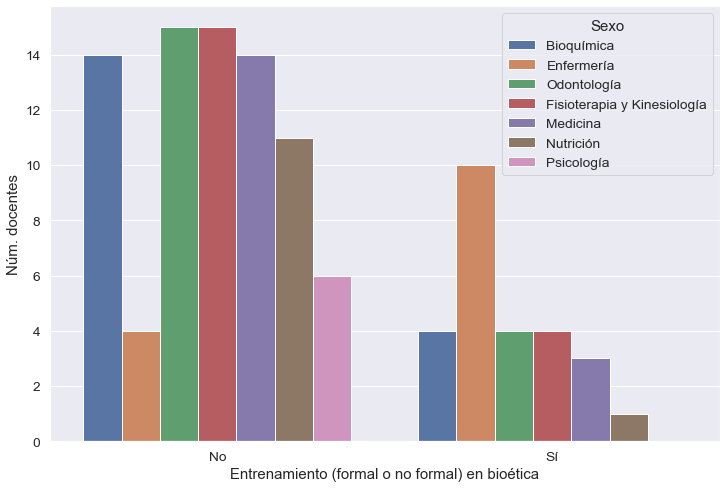

In [93]:
sns.countplot(x=entrenamiento, hue=variable, data=df, order=['No','Sí'])
plt.xlabel('Entrenamiento (formal o no formal) en bioética')
plt.ylabel('Núm. docentes')
plt.legend(title='Sexo', loc='upper right')
plt.show()

## Entrenamiento y experiencia docente

In [94]:
variable = 'experiencia'
entrenamiento = 'entrenamiento'
df.groupby(entrenamiento)[variable].describe().round().transpose()

entrenamiento,No,Sí
count,79.0,26.0
mean,8.0,11.0
std,7.0,8.0
min,1.0,1.0
25%,3.0,4.0
50%,5.0,8.0
75%,12.0,18.0
max,35.0,28.0


In [95]:
scipy.stats.kruskal(*[data[variable].values for name, data in df.groupby(entrenamiento)], nan_policy='omit')

KruskalResult(statistic=1.7186296638096883, pvalue=0.18986953290504127)

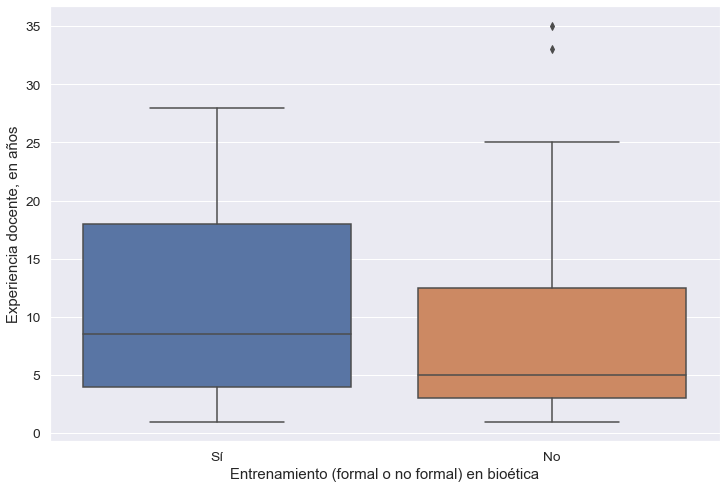

In [96]:
sns.boxplot(x=entrenamiento, y=variable, data =df)
plt.xlabel('Entrenamiento (formal o no formal) en bioética')
plt.ylabel('Experiencia docente, en años')
plt.show()